In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\\Users\\wkrud\\Desktop\\OpenSW_Data-Science-main\\train\\train.csv")
df

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12,0.0
1,0,0,30,0,0,1.5,69.06,-12,0.0
2,0,1,0,0,0,1.6,71.78,-12,0.0
3,0,1,30,0,0,1.6,71.75,-12,0.0
4,0,2,0,0,0,1.6,75.20,-12,0.0
...,...,...,...,...,...,...,...,...,...
52555,1094,21,30,0,0,2.4,70.70,-4,0.0
52556,1094,22,0,0,0,2.4,66.79,-4,0.0
52557,1094,22,30,0,0,2.2,66.78,-4,0.0
52558,1094,23,0,0,0,2.1,67.72,-4,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     52560 non-null  int64  
 1   Hour    52560 non-null  int64  
 2   Minute  52560 non-null  int64  
 3   DHI     52560 non-null  int64  
 4   DNI     52560 non-null  int64  
 5   WS      52560 non-null  float64
 6   RH      52560 non-null  float64
 7   T       52560 non-null  int64  
 8   TARGET  52560 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 3.6 MB


In [5]:
df.describe()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,547.000000,11.500000,15.000000,64.344121,234.792371,2.456033,56.793102,9.279928,17.790630
std,316.102148,6.922252,15.000143,103.897125,349.684583,1.426874,22.052875,10.179741,25.759955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.590000,-19.000000,0.000000
25%,273.000000,5.750000,0.000000,0.000000,0.000000,1.400000,39.697500,1.000000,0.000000
50%,547.000000,11.500000,15.000000,0.000000,0.000000,2.200000,57.600000,9.000000,0.000000
75%,821.000000,17.250000,30.000000,87.000000,469.000000,3.200000,72.770000,17.000000,32.089890
max,1094.000000,23.000000,30.000000,528.000000,1059.000000,12.000000,100.000000,35.000000,99.913939


In [6]:
# 태양광 발전량과 상관관계가 있는 컬럼 확인
df.corr()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
Day,1.000000,0.000000,0.000000,-0.027802,0.021901,0.038477,-0.127688,0.072897,-0.002505
Hour,0.000000,1.000000,0.000000,0.029905,-0.018094,-0.055903,-0.084275,0.105528,0.003817
Minute,0.000000,0.000000,1.000000,-0.001305,-0.000997,-0.009522,0.008839,-0.007646,-0.000240
DHI,-0.027802,0.029905,-0.001305,1.000000,0.288294,0.203286,-0.478503,0.457813,0.666908
DNI,0.021901,-0.018094,-0.000997,0.288294,1.000000,0.219555,-0.611184,0.402460,0.833547
WS,0.038477,-0.055903,-0.009522,0.203286,0.219555,1.000000,-0.230035,0.027693,0.238521
RH,-0.127688,-0.084275,0.008839,-0.478503,-0.611184,-0.230035,1.000000,-0.532777,-0.677178
T,0.072897,0.105528,-0.007646,0.457813,0.402460,0.027693,-0.532777,1.000000,0.561990
TARGET,-0.002505,0.003817,-0.000240,0.666908,0.833547,0.238521,-0.677178,0.561990,1.000000


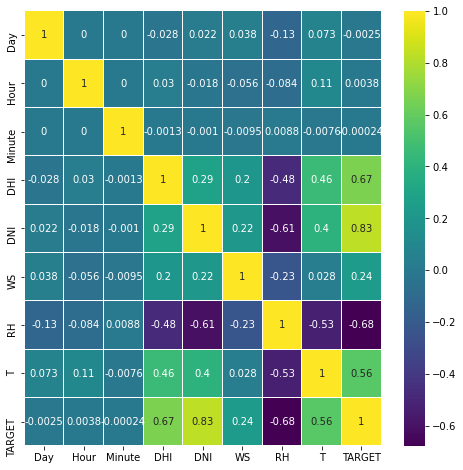

In [7]:
#히트맵으로 TARGET과 상관관계를 시각적으로 표현
# DHI(수평면 산란일사량)과 DNI(직달일사량), 기온이 태양광 발전량과 양의 상관관계에 있음을 알 수 있다.
# RH(상대습도)와 태양관 발전량과 음의 상관관계가 있음을 알 수 있다.
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), linewidths=0.01, annot=True, cmap=plt.cm.viridis)
plt.show()

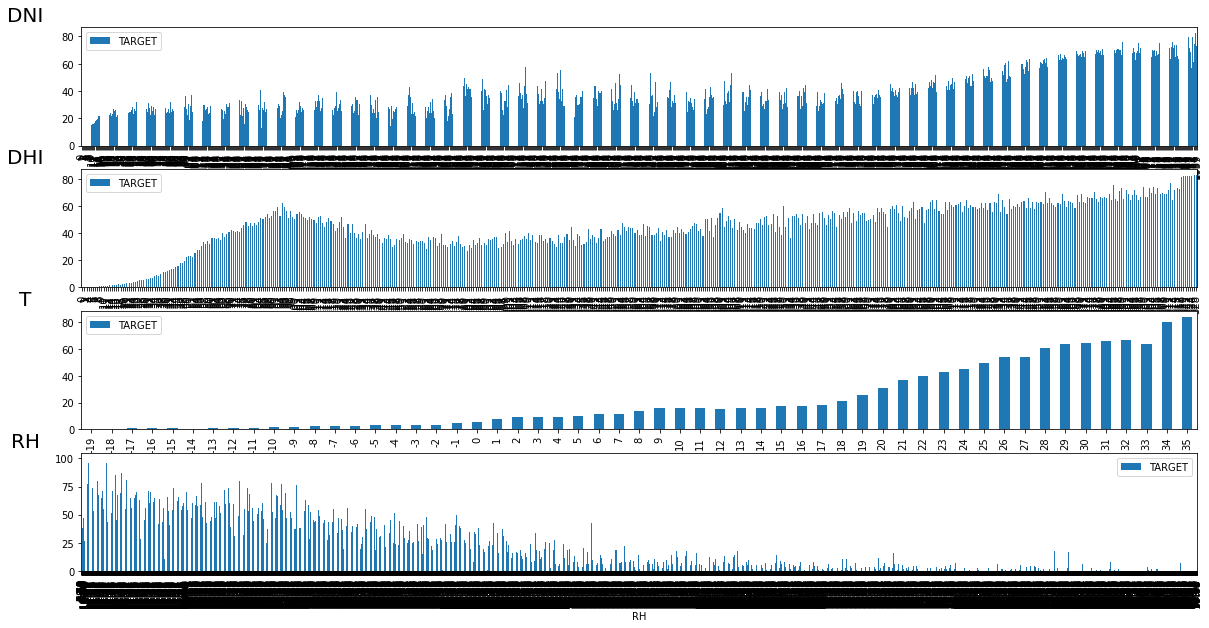

In [8]:
#상관계수가 큰 index들을 히스토그램으로 표현
# y축의 값은 태양광 발전량임
plt.figure(figsize=(20, 10))
sub1 = plt.subplot(411)
sub1.set_title('DNI', position=(-0.05, 0), size=20)
sub2 = plt.subplot(412)
sub2.set_title('DHI', position=(-0.05, 0), size=20)
sub3 = plt.subplot(413)
sub3.set_title('T', position=(-0.05, 0), size=20)
sub4 = plt.subplot(414)
sub4.set_title('RH', position=(-0.05, 0), size=20)
df[ ['DNI', 'TARGET'] ].groupby(['DNI']).mean().plot.bar(ax=sub1)
df[ ['DHI', 'TARGET'] ].groupby(['DHI']).mean().plot.bar(ax=sub2)
df[ ['T', 'TARGET'] ].groupby(['T']).mean().plot.bar(ax=sub3)
df[ ['RH', 'TARGET'] ].groupby(['RH']).mean().plot.bar(ax=sub4)
plt.show()

In [9]:
#각 index들의 범위 확인
print("DNI_max: " + str(df["DNI"].max()))
print("DNI_min: " + str(df["DNI"].min()))
print("DHI_max: " + str(df["DHI"].max()))
print("DHI_min: " + str(df["DHI"].min()))
print("T_max: " + str(df["T"].max()))
print("T_min: " + str(df["T"].min()))
print("RH_max: " + str(df["RH"].max()))
print("RH_min: " + str(df["RH"].min()))

DNI_max: 1059
DNI_min: 0
DHI_max: 528
DHI_min: 0
T_max: 35
T_min: -19
RH_max: 100.0
RH_min: 7.59


In [10]:
#데이터 집계를 위한 전처리
#각 index에서 약 33%씩 3개로 나눠 int형으로 라벨링
df['DNI_label'] = pd.cut(df['DNI'], bins=[0, 353, 706, 1059], include_lowest=True, labels=['1', '2', '3'])
df['DHI_label'] = pd.cut(df['DHI'], bins=[0, 176, 352, 528], include_lowest=True, labels=['1', '2', '3'])
df['T_label'] = pd.cut(df['T'], bins=[-19, -1, 17, 35], include_lowest=True, labels=['1', '2', '3'])
df['RH_label'] = pd.cut(df['RH'], bins=[7.59, 28, 64, 100], include_lowest=True, labels=['1', '2', '3'])
df

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,DNI_label,DHI_label,T_label,RH_label
0,0,0,0,0,0,1.5,69.08,-12,0.0,1,1,1,3
1,0,0,30,0,0,1.5,69.06,-12,0.0,1,1,1,3
2,0,1,0,0,0,1.6,71.78,-12,0.0,1,1,1,3
3,0,1,30,0,0,1.6,71.75,-12,0.0,1,1,1,3
4,0,2,0,0,0,1.6,75.20,-12,0.0,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,1094,21,30,0,0,2.4,70.70,-4,0.0,1,1,1,3
52556,1094,22,0,0,0,2.4,66.79,-4,0.0,1,1,1,3
52557,1094,22,30,0,0,2.2,66.78,-4,0.0,1,1,1,3
52558,1094,23,0,0,0,2.1,67.72,-4,0.0,1,1,1,3


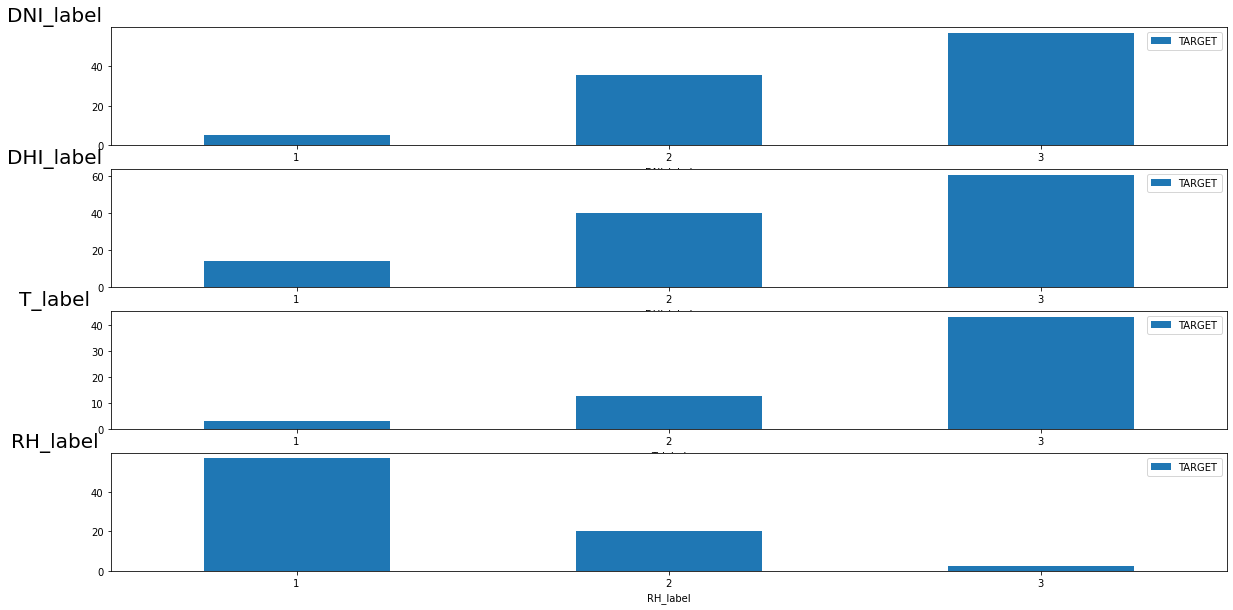

In [11]:
#양의 상관관계인 index들은 그 값이 커질수록 태양광 발전량도 많아짐을 알 수 있다.
#음의 상관관계인 index는 그 값이 작아질수록 태양광 발전량이 많아짐을 알 수 있다.
plt.figure(figsize=(20, 10))
sub1 = plt.subplot(411)
sub1.set_title('DNI_label', position=(-0.05, 0), size=20)
sub2 = plt.subplot(412)
sub2.set_title('DHI_label', position=(-0.05, 0), size=20)
sub3 = plt.subplot(413)
sub3.set_title('T_label', position=(-0.05, 0), size=20)
sub4 = plt.subplot(414)
sub4.set_title('RH_label', position=(-0.05, 0), size=20)
df[ ['DNI_label', 'TARGET'] ].groupby(['DNI_label']).mean().plot.bar(ax=sub1, rot= 0)
df[ ['DHI_label', 'TARGET'] ].groupby(['DHI_label']).mean().plot.bar(ax=sub2, rot= 0)
df[ ['T_label', 'TARGET'] ].groupby(['T_label']).mean().plot.bar(ax=sub3, rot= 0)
df[ ['RH_label', 'TARGET'] ].groupby(['RH_label']).mean().plot.bar(ax=sub4, rot= 0)
plt.show()

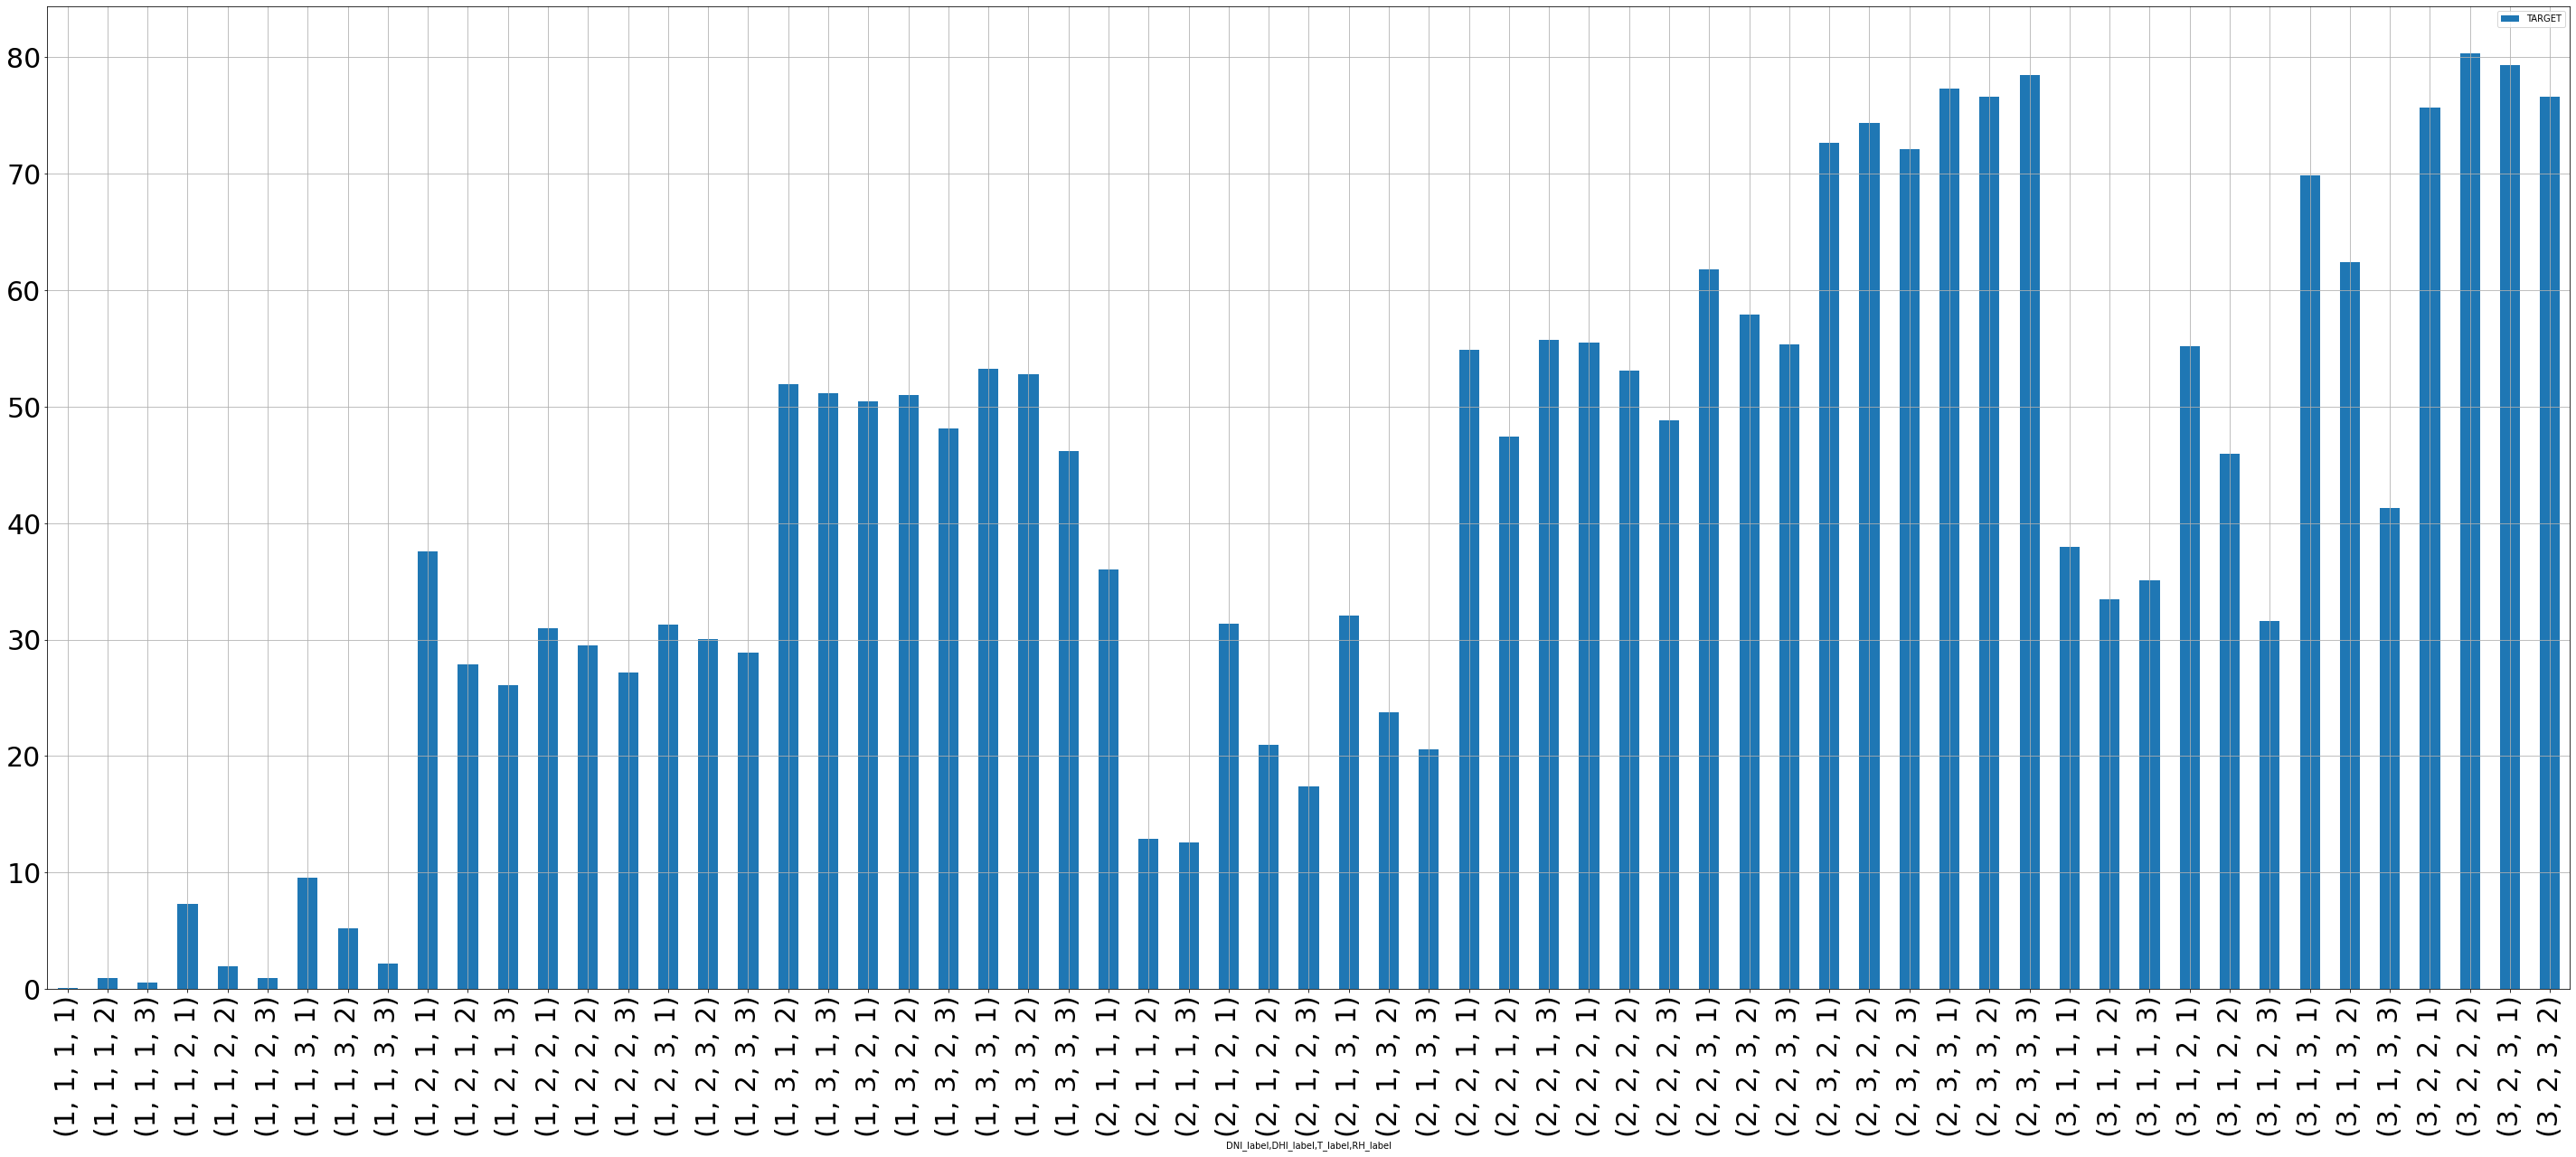

In [13]:
#(DNI_label, DHI_label, T_label, RH_label)을 매개변수로 TARGET에 대하여 집계하였음 
df_table = pd.pivot_table(df, index=['DNI_label', 'DHI_label', 'T_label', 'RH_label'], values=['TARGET'], aggfunc=np.mean)
df_table.plot(kind='bar', figsize=(50, 20), fontsize=30)
plt.grid()